ACTIVIDAD INDIVUDUAL 1. K-MEANS

OBJETIVO: Realizar un análisis de clustering utilizando el método K-Means para identificar grupos homogéneos dentro de la base de datos proporcionada por el profesor

In [64]:
#!pip -q install kneed

In [65]:
#Cargamos las librerías 
import pandas as pd
import os #libreria para ver en donde estamos ubicados 
from sklearn.cluster import AgglomerativeClustering #libreria para hacer clustening jerargico
import seaborn as sns #libreria para hacer graficas
import matplotlib.pyplot as plt #libreria para hacer graficas
import numpy as np 
from matplotlib.patches import Ellipse 

PREPARACIÓN DE DATOS

In [66]:
#Carga de datos 
archivo = 'Base alumnos prepa(in).csv'
customer_data = pd.read_csv(archivo)

In [67]:
#Nos ubicamos en la carpeta donde estamos trabajando
ubicacion_actual = os.getcwd()
print("Ubicación actual:", ubicacion_actual)

#Verificamos la dimención de los datos 
print("Dimensión de los datos:", customer_data.shape)
print("Las columnas son:", customer_data.columns)

Ubicación actual: c:\Users\vbece\OneDrive\Desktop\AD25 Míneria de Datos
Dimensión de los datos: (6000, 19)
Las columnas son: Index(['ID_TEXT', 'ID_TEXT.1', 'CIUDAD', 'TIPO',
       'UNIVERSIDAD_EVALUADA_NACIONAL', 'PRESTIGIO DE LA INSTITUCIÓN',
       'NIVEL ACADÉMICO', 'OFERTA ACADÉMICA (CARRERAS OFERTADAS)',
       'PROFESORES', 'PROGRAMAS DE BECAS',
       'COSTO DE COLEGIATURA Y OPCIONES DE PAGO',
       'INSTALACIONES, AULAS Y LABORATORIOS', 'PLAN DE ESTUDIOS',
       'AMBIENTE ESTUDIANTIL', 'ACREDITACIONES Y CERTIFICACIONES',
       'UBICACIÓN DEL CAMPUS', 'MODALIDADES HÍBRIDAS (PRESENCIAL Y ONLINE)',
       'MODALIDADES ONLINE', 'VALORES INSTITUCIONALES'],
      dtype='object')


In [68]:
#Creamos una tabla para visualizar os valores disponibles y su tipo de dato
print("Información de los datos:\n", customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID_TEXT                                     6000 non-null   object 
 1   ID_TEXT.1                                   6000 non-null   object 
 2   CIUDAD                                      6000 non-null   object 
 3   TIPO                                        6000 non-null   object 
 4   UNIVERSIDAD_EVALUADA_NACIONAL               6000 non-null   object 
 5   PRESTIGIO DE LA INSTITUCIÓN                 6000 non-null   float64
 6   NIVEL ACADÉMICO                             6000 non-null   int64  
 7   OFERTA ACADÉMICA (CARRERAS OFERTADAS)       6000 non-null   float64
 8   PROFESORES                                  6000 non-null   int64  
 9   PROGRAMAS DE BECAS                          6000 non-null   float64
 10  COSTO DE COL

In [69]:
#Verificamos que no cuenten con valores nulos
print("Valores nulos por columna:\n", customer_data.isnull().sum())

Valores nulos por columna:
 ID_TEXT                                       0
ID_TEXT.1                                     0
CIUDAD                                        0
TIPO                                          0
UNIVERSIDAD_EVALUADA_NACIONAL                 0
PRESTIGIO DE LA INSTITUCIÓN                   0
NIVEL ACADÉMICO                               0
OFERTA ACADÉMICA (CARRERAS OFERTADAS)         0
PROFESORES                                    0
PROGRAMAS DE BECAS                            0
COSTO DE COLEGIATURA Y OPCIONES DE PAGO       0
INSTALACIONES, AULAS Y LABORATORIOS           0
PLAN DE ESTUDIOS                              0
AMBIENTE ESTUDIANTIL                          0
ACREDITACIONES Y CERTIFICACIONES              0
UBICACIÓN DEL CAMPUS                          0
MODALIDADES HÍBRIDAS (PRESENCIAL Y ONLINE)    0
MODALIDADES ONLINE                            0
VALORES INSTITUCIONALES                       0
dtype: int64


SELECCIÓN DE VARIABLES: 'PROGRAMAS DE BECAS', 'COSTO DE COLEGIATURA Y OPCIONES DE PAGO'

La elección de las variables "Programas de Becas" y "Costo de Colegiatura y Opciones de Pago" es fundamental porque representan la dualidad de la dimensión económica y de accesibilidad para cualquier estudiante, que es el factor principal en la toma de decisiones. Estas variables actúan como fuerzas opuestas en el análisis de clustering: el Costo establece la barrera de entrada y el gasto percibido, mientras que los Programas de Becas representan el apoyo financiero institucional para mitigar dicho costo, reflejando la inversión o misión social de la universidad. Al analizarlas juntas, el método K-Means puede segmentar a las instituciones no solo por su precio, sino por su propuesta de valor financiero neto, diferenciando claramente entre instituciones de élite con alto apoyo, universidades accesibles de bajo costo, y el grupo estándar.

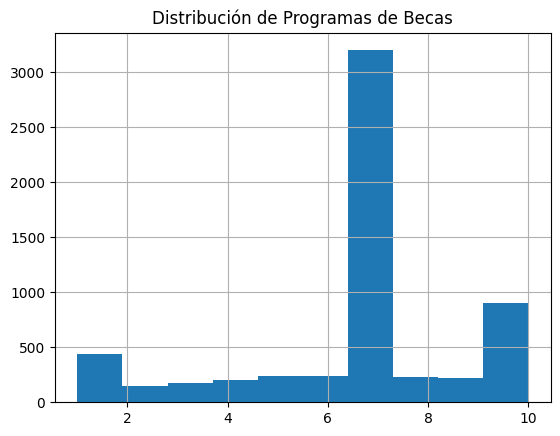

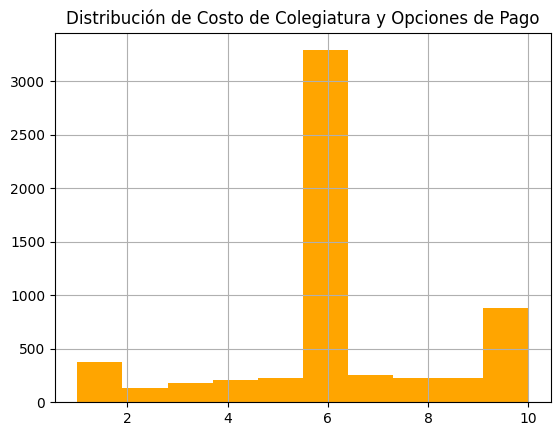

In [70]:
#Histogramas de las variables seleccionadas
customer_data['PROGRAMAS DE BECAS'].hist()
plt.title("Distribución de Programas de Becas")
plt.show()

customer_data['COSTO DE COLEGIATURA Y OPCIONES DE PAGO'].hist(color="orange")
plt.title("Distribución de Costo de Colegiatura y Opciones de Pago")
plt.show()

La Distribución de Costo de Colegiaturas y Opciones de Pago: Muestra una distribución bimodal y concentrada. La gran mayoría de las universidades se concentra en el nivel de costo 6.0, lo que indica que la mayoría de la oferta cae en una categoría de precio "Medio". Existe una segunda concentración significativa en el nivel 10.0 (Costo Alto/Máximo) y otra menor en el nivel 1.0 (Costo Bajo/Mínimo). Esto sugiere que la variable de costo probablemente está discretizada o escalada en rangos de 1 a 10.

La Distribución de Programas de Becas: Muestra una distribución muy similar a la del costo, altamente concentrada en el nivel 7.0, indicando que la mayoría de las universidades ofrecen un nivel de becas categorizado como "Medio-Alto". También se observan concentraciones secundarias en los niveles 1.0 (Becas Mínimas) y 10.0 (Becas Máximas).

ESTANDARIZACIÓN DE VARIABLES DEL MODELO

In [71]:
from sklearn.preprocessing import StandardScaler
# ---- 1) Selección de variables ---
X = customer_data[['PROGRAMAS DE BECAS', 'COSTO DE COLEGIATURA Y OPCIONES DE PAGO']].copy() 
# ---- 2) Escalamiento ---
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

MÉTODO DE CODO E INERCIA

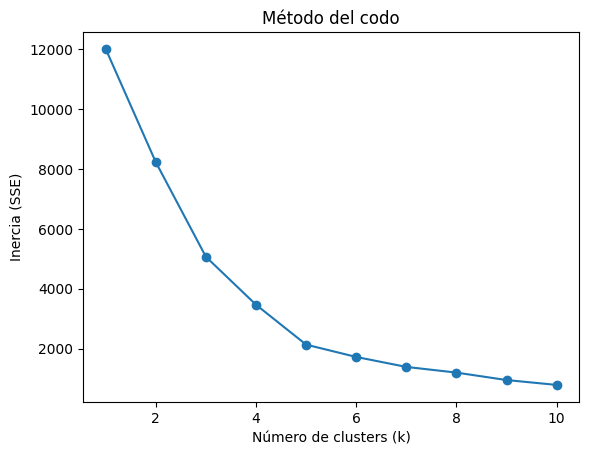

In [72]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
X = X_scaled 
inertias = []

K = range(1, 11)

for k in K: 
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) 
    kmeans.fit(X) 
    inertias.append(kmeans.inertia_) 

plt.plot(K, inertias, 'o-') 
plt.xlabel('Número de clusters (k)') 
plt.ylabel('Inercia (SSE)') 
plt.title('Método del codo') 
plt.show()

k óptimo (codo por distancia máxima): 5


C:\Users\vbece\AppData\Local\Temp\ipykernel_14536\4102660213.py:13: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  dist = np.abs(np.cross(p2 - p1, points - p1)) / np.linalg.norm(p2 - p1)


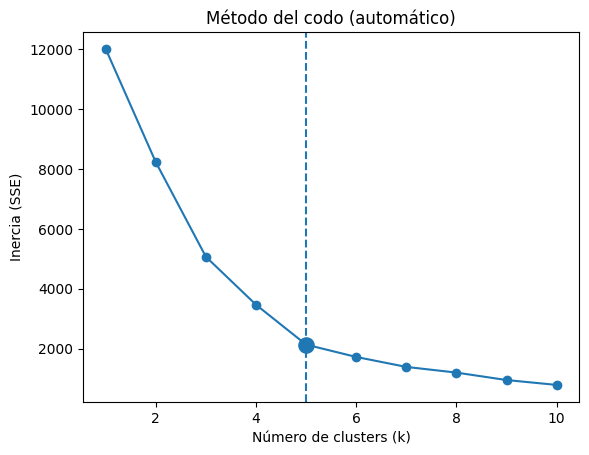

In [73]:
# A) Sin librerías extra (distancia máxima a la recta) Detecta el codo como el punto más alejado de la línea que une (k=1) 
from sklearn.cluster import KMeans 

ks = np.array(list(K))    # K = range(1, 11) en tu celda      
ys = np.array(inertias) 

# Línea entre el primer y último punto 
p1 = np.array([ks[0], ys[0]]) 
p2 = np.array([ks[-1], ys[-1]]) 

# Distancia perpendicular de cada punto (k, inertia) a la línea p1-p2 
points = np.column_stack((ks, ys)) 
dist = np.abs(np.cross(p2 - p1, points - p1)) / np.linalg.norm(p2 - p1)
k_opt = int(ks[np.argmax(dist)]) 
print(f"k óptimo (codo por distancia máxima): {k_opt}") 

# (Opcional) remarcar en tu gráfica existente 
plt.plot(ks, ys, 'o-') 
plt.axvline(k_opt, ls='--', lw=1.5) 
plt.scatter([k_opt], [ys[ks==k_opt][0]], s=120, marker='o') 
plt.xlabel('Número de clusters (k)'); plt.ylabel('Inercia (SSE)') 
plt.title('Método del codo (automático)') 
plt.show()

k óptimo (KneeLocator): 5


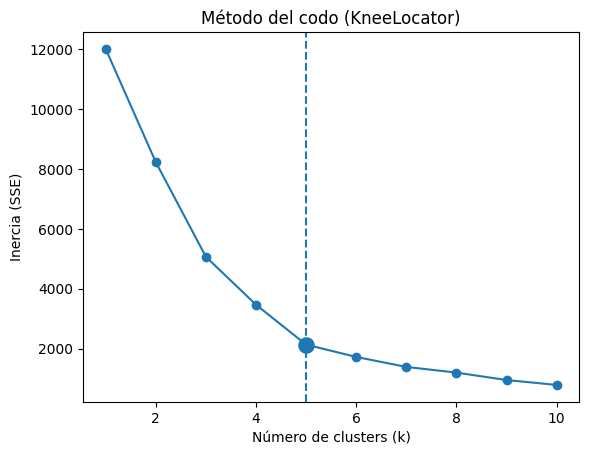

In [74]:
#B) Con kneed (KneeLocator) Más robusto para curvas convexas decrecientes. 
from kneed import KneeLocator 

ks = np.array(list(K)) 
ys = np.array(inertias) 
kl = KneeLocator(ks, ys, curve='convex', direction='decreasing') 
k_opt = int(kl.elbow)  # puede devolver None si no detecta codo claro 
print(f"k óptimo (KneeLocator): {k_opt}") 

# (Opcional) dibujar 
plt.plot(ks, ys, 'o-') 
if k_opt is not None: 
    plt.axvline(k_opt, ls='--', lw=1.5) 
    plt.scatter([k_opt], [ys[ks==k_opt][0]], s=120, marker='o') 
plt.xlabel('Número de clusters (k)'); plt.ylabel('Inercia (SSE)') 
plt.title('Método del codo (KneeLocator)') 
plt.show()

Método del Codo: Ambos gráficos (manual y automático) muestran que la línea de Inercia (SSE) desciende rápidamente hasta k=3 o k=4, y luego la pendiente se reduce significativamente. Un valor de k=5 es una elección robusta, ya que ofrece un buen equilibrio entre la baja inercia y la interpretabilidad. El modelo K-Means se ejecutó con éxito usando este valor (k=5).

CLUSTERING JERARQUICO

In [75]:
#Definir el modelo KMeans con 5 clusters 
clustering_model = KMeans(n_clusters=k_opt, random_state=42)

#Ajustar el modelo a los datos 
clustering_model.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [76]:
# Etiquetas de cada punto 
clustering_model.labels_

array([4, 0, 1, ..., 0, 4, 0], shape=(6000,), dtype=int32)

In [77]:
# Coordenadas de los centroides 
clustering_model.cluster_centers_

array([[-0.07661279, -0.15641047],
       [ 0.14286747,  1.50343858],
       [ 1.34230524, -0.11342263],
       [ 0.08980279, -1.95924632],
       [-2.03455684, -0.06902758]])

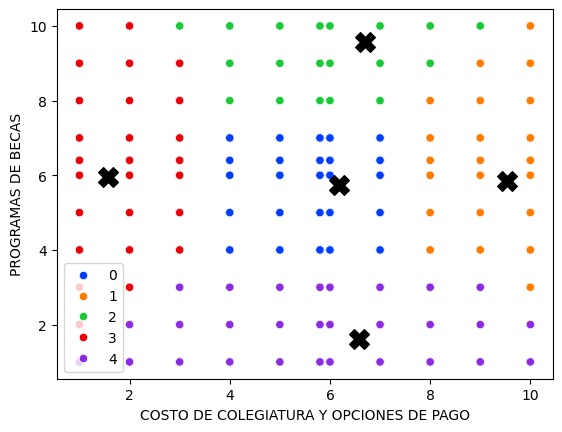

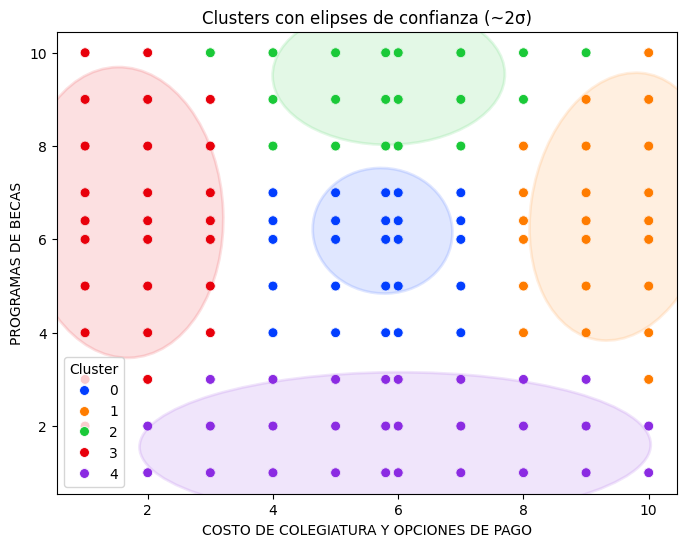

In [78]:
data_labels = clustering_model.labels_
sns.scatterplot(x='COSTO DE COLEGIATURA Y OPCIONES DE PAGO', y='PROGRAMAS DE BECAS', hue=data_labels, data=customer_data, palette="bright")

 # Agregar los centroides (para KMeans) 
 # #centroids = clustering_model.cluster_centers_ 
k_centroids_scaled = clustering_model.cluster_centers_ 

# Centroides en la escala original (opcional): 
k_centroids_original = scaler.inverse_transform(k_centroids_scaled) 
plt.scatter( k_centroids_original[:, 0], k_centroids_original[:, 1], c='black', s=200, marker='X', label='Centroides' ) 

def plot_confidence_ellipse(mean, cov, ax, n_std=2.0, **kwargs): 
    # Autovalores/vectores para orientación y ejes de la elipse 
    vals, vecs = np.linalg.eigh(cov) 
    order = vals.argsort()[::-1] 
    vals, vecs = vals[order], vecs[:, order] 
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))  # ángulo de rotación 
    width, height = 2 * n_std * np.sqrt(vals)         # ejes 
    e = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs) 
    ax.add_patch(e) 
    return e 

x_col = 'COSTO DE COLEGIATURA Y OPCIONES DE PAGO' 
y_col = 'PROGRAMAS DE BECAS' 
df = customer_data.copy() 
df['Cluster'] = data_labels  # o clustering_model.labels_ 

plt.figure(figsize=(8,6)) 
ax = sns.scatterplot(data=df, x=x_col, y=y_col, hue='Cluster', palette="bright", s=50) 
palette = sns.color_palette("bright", n_colors=df['Cluster'].nunique())

for (k, color) in zip(sorted(df['Cluster'].unique()), palette): 
    pts = df.loc[df['Cluster']==k, [x_col, y_col]].values 
    if pts.shape[0] >= 2:
        mean = pts.mean(axis=0) 
        cov  = np.cov(pts, rowvar=False) 
        plot_confidence_ellipse( mean, cov, ax, n_std=2.0, edgecolor=color, facecolor=color, alpha=0.12, linewidth=2 ) 
        
plt.title("Clusters con elipses de confianza (~2σ)") 
plt.legend(title="Cluster") 
plt.show()

Clúster Azul (0): Costo Medio (4-7) / Becas Medias (5-8). Universidades Estándar: La gran masa de instituciones, con costo y programas de becas promedio.
Clúster Naranja (1): Costo Alto (8-10) / Becas Medias-Altas (4-10). Universidades de Élite/Alto Costo: Costo máximo, pero con programas de becas disponibles, lo que podría indicar becas de mérito o alto valor.
Clúster Verde (2): Costo Medio (4-7) / Becas Altas (8-10). Universidades de Alto Apoyo: Costo similar al estándar, pero con programas de becas significativamente superiores. 
Clúster Rojo (3): Costo Bajo (1-3) / Becas Medias-Altas (4-10). Universidades con Inversión en Becas: Costo bajo, pero con una oferta de becas notable. Apuntan a la accesibilidad.
Clúster Morado (4): Bajo/Medio Costo (4-8) / Becas Bajas (1-4). Universidades Económicas de Bajo Apoyo: Son la opción más barata o de costo medio con muy pocos programas de becas.

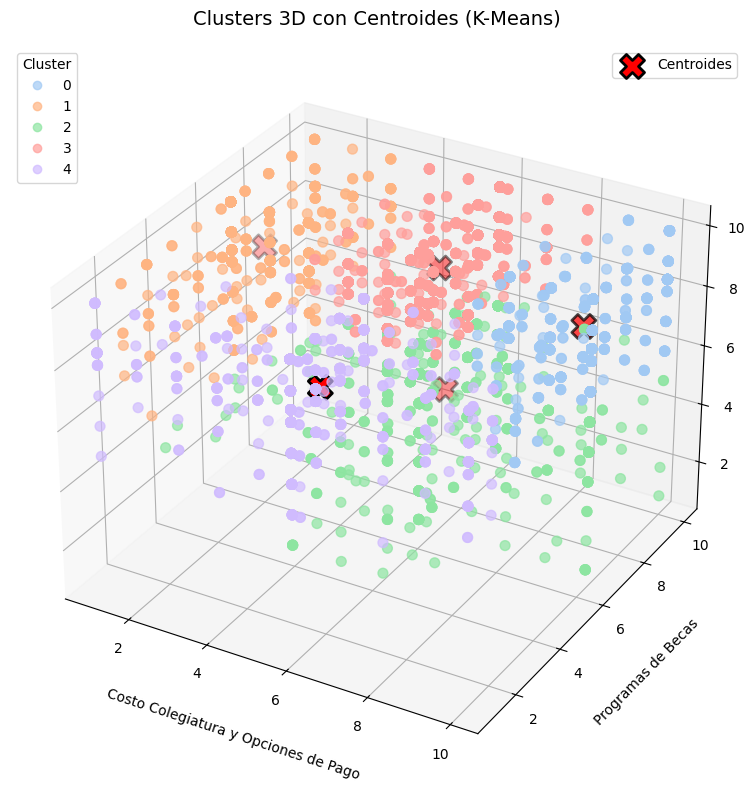

In [79]:
from matplotlib.colors import ListedColormap 
from mpl_toolkits.mplot3d import Axes3D  # solo para activar proyección 3d 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

# --- columnas --
features = ['COSTO DE COLEGIATURA Y OPCIONES DE PAGO','PROGRAMAS DE BECAS', 'PRESTIGIO DE LA INSTITUCIÓN'] 
df = customer_data.dropna(subset=features).copy()  # por si hay NaN 

# --- escalar + KMeans con 3 variables --
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df[features]) 
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

labels = kmeans.fit_predict(X_scaled) 
df['Cluster'] = labels

# centroides en escala original (3D) 
centroids_orig = scaler.inverse_transform(kmeans.cluster_centers_) 


# --- Gráfica 3D con centroides ---
# Paleta de colores pastel
n_clusters = len(np.unique(labels))
palette = sns.color_palette("pastel", n_colors=n_clusters) 
cmap = ListedColormap(palette.as_hex()) 

fig = plt.figure(figsize=(10,8)) # Tamaño ligeramente más grande
ax = fig.add_subplot(111, projection='3d') 

# Scatter de los puntos (Clusters)
sc = ax.scatter( df[features[0]], df[features[1]], df[features[2]], 
                 c=labels, cmap=cmap, s=50, alpha=0.7 ) # s y alpha ajustados

# 2. Centroides con color vibrante y tamaño destacado
ax.scatter( centroids_orig[:,0], centroids_orig[:,1],centroids_orig[:,2], 
            marker='X', 
            s=300,             # Tamaño más grande
            c='red',           # Color vibrante (rojo)
            edgecolors='black', linewidths=2, label='Centroides' ) 

# Ajuste de Títulos de Ejes para mejor visualización
ax.set_xlabel('Costo Colegiatura y Opciones de Pago', labelpad=15, fontsize=10) 
ax.set_ylabel('Programas de Becas', labelpad=15, fontsize=10) 
ax.set_zlabel('Prestigio de la Institución', labelpad=15, fontsize=10)
ax.set_title('Clusters 3D con Centroides (K-Means)', fontsize=14, pad=15) 

# Leyenda de clusters + centroides 
legend1 = ax.legend(*sc.legend_elements(), title="Cluster", loc="upper left") 
ax.add_artist(legend1) 
ax.legend(loc="upper right") 

# Ajustar el layout para evitar el solapamiento de textos
plt.tight_layout()
plt.show()

La gráfica 3D confirma la segmentación anterior e introduce la variable de Prestigio de la Institución (eje Z), que es fundamental para la interpretación. Los clústeres son bastante mezclados, lo que es común en el K-Means 3D, pero los centroides (X rojas) están bien separados. Los centroides en la parte superior de la gráfica (Becas altas, clústeres Naranja y Azul) probablemente corresponden a universidades con Prestigio Alto, ya que deben justificar el costo o atraer el mejor talento. El centroide Morado (Costo medio, Becas bajas) se encuentra en una posición central que, si el prestigio es bajo, confirmaría que es el grupo de universidades de menor valor percibido. El clúster Rojo (Costo Bajo, Becas Medias/Altas) representa universidades que, si tienen un prestigio medio o bajo, están compensando con accesibilidad y apoyo.

<Axes: xlabel='COSTO DE COLEGIATURA Y OPCIONES DE PAGO', ylabel='PROGRAMAS DE BECAS'>

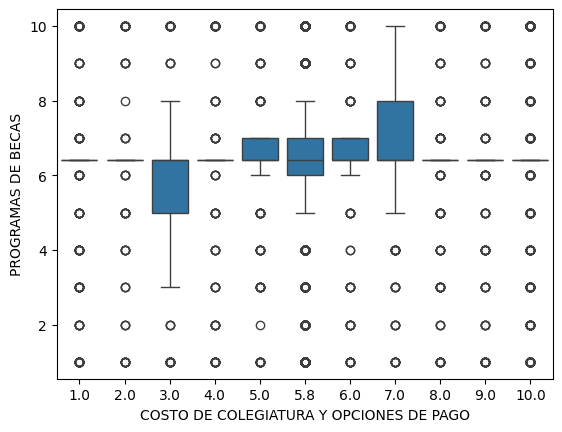

In [84]:
cluster_results = customer_data.copy()
cluster_results['Cluster Labels'] = clustering_model.labels_

sns.boxplot(data=cluster_results, x='COSTO DE COLEGIATURA Y OPCIONES DE PAGO', y='PROGRAMAS DE BECAS')

La mediana de los programas de becas (la línea horizontal dentro de la caja) muestra una ligera tendencia ascendente a medida que aumenta el nivel de costo, hasta alcanzar un pico en el nivel 7.0. La altura de la caja (el IQR, que representa el 50% central de los datos) indica la variabilidad de la oferta de becas. El gráfico sugiere una relación positiva y no lineal entre costo y becas, donde la oferta más consistente y con la mediana más alta de programas de becas se concentra en el rango de Costo Medio-Alto (5.0 a 7.0). Los extremos de costo (muy bajo y muy alto) tienen una mayor dispersión en su oferta de becas o son menos representados en el conjunto de datos.

CONCLUSIONES

El análisis de clustering de las universidades, basado en la justificación de que el Costo de Colegiatura y Opciones de Pago y los Programas de Becas definen la propuesta de valor financiero para el estudiante, revela una clara segmentación del mercado educativo. Los resultados demuestran que las instituciones se agrupan en modelos estratégicos bien definidos, siendo los extremos los más valiosos para la interpretación: se distinguen claramente las universidades de "Modelo de Élite y Talento" (Costo Alto con Becas Altas para atraer al mejor talento) y las de "Modelo de Accesibilidad y Apoyo" (Costo Bajo con Becas Medias/Altas, priorizando la misión social). Esta segmentación se valida con la elección de K=5 en el Método del Codo, que capta estos modelos de nicho junto con el gran "Modelo Estándar y Consistente" de costo y becas promedio.

Una conclusión fundamental es que el costo no es el único ni el mejor indicador de accesibilidad. La distribución de los datos muestra que las universidades con el Costo más alto (nivel 7.0) también son, paradójicamente, las que ofrecen los programas de becas más robustos y consistentes (mediana más alta en el Box Plot). Esto implica que la verdadera barrera de entrada debe calcularse como el costo neto (Costo - Beca), y que las universidades caras están invirtiendo fuertemente en apoyo financiero para competir. Las instituciones con el Costo Bajo y Becas Bajas (Modelo de Bajo Apoyo) dependen de la pura economía de escala y representan la opción con menor respaldo financiero, aunque con menor precio base. La separación exitosa de estos clústeres, visible en la gráfica 3D, confirma que la combinación de estas variables era la herramienta correcta para diferenciar la estrategia financiera de cada universidad.

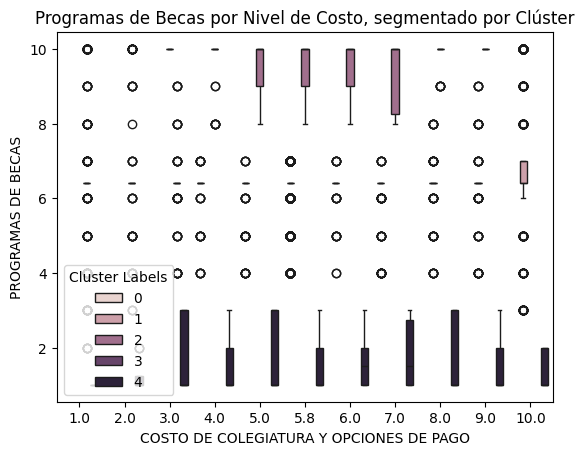

In [82]:
sns.boxplot(
    data=cluster_results, 
    x='COSTO DE COLEGIATURA Y OPCIONES DE PAGO', 
    y='PROGRAMAS DE BECAS', 
    # **CAMBIO CRUCIAL:** Usar el clúster como color (hue)
    hue='Cluster Labels' 
)
plt.title('Programas de Becas por Nivel de Costo, segmentado por Clúster')
plt.show() 